# GRIP - The Sparks Foundation
# Data Science and Business Analytics internship
## Task 2 : Prediction using Unsupervised ML
## Dataset : Iris.csv

### Task : From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.
## Author : Riya Lal

In [23]:
# importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [12]:
import warnings as wg
wg.filterwarnings("ignore")

# Loading the iris dataset

In [16]:
# Reading the Data 
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [36]:
# displaying rows
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Exploring the Dataset

In [26]:
# representing the dimensionality of the DataFrame
iris_df.shape

(150, 4)

In [28]:
# checking for null values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [31]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# Finding the optimum number of clusters for k-means classification
x = iris_df.iloc[:,[0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [32]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Data Visualization for Species using box plot graph and pairplot

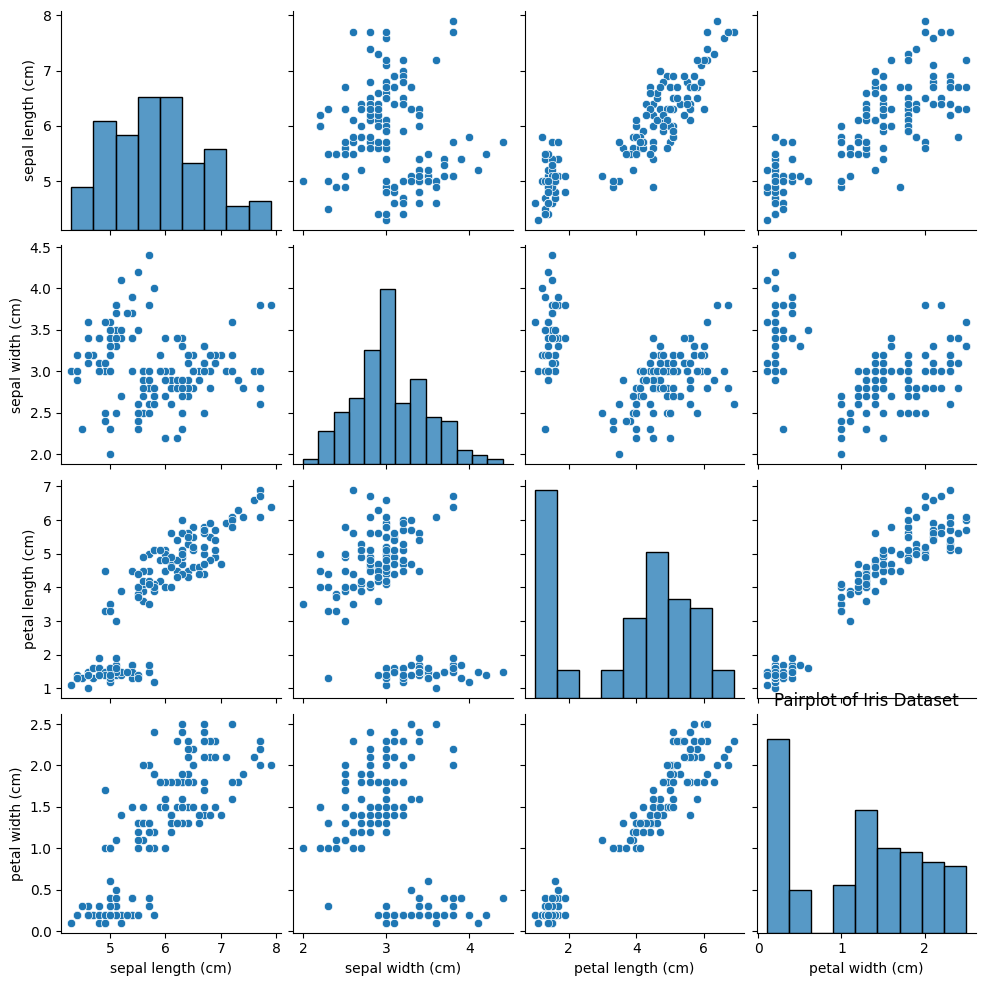

In [38]:
# Pairplot to visualize relationships between variables
sns.pairplot(iris_df)
plt.title('Pairplot of Iris Dataset')
plt.show()

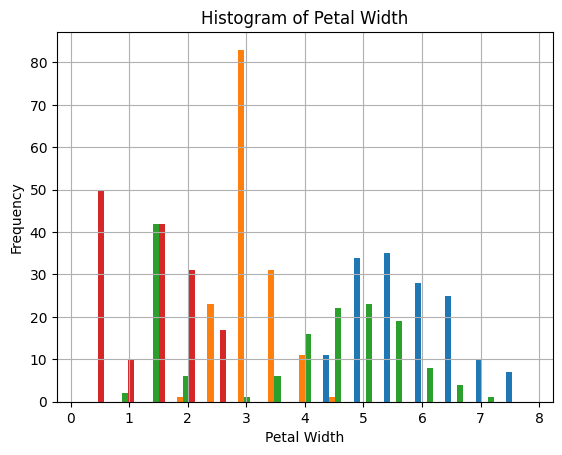

In [47]:
# Histogram to visualize the distribution of features
plt.hist(iris_df, bins=15)
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Width')
plt.grid(True)
plt.show()

In [49]:
# Calculate correlation matrix
correlation_matrix = iris_df.corr()

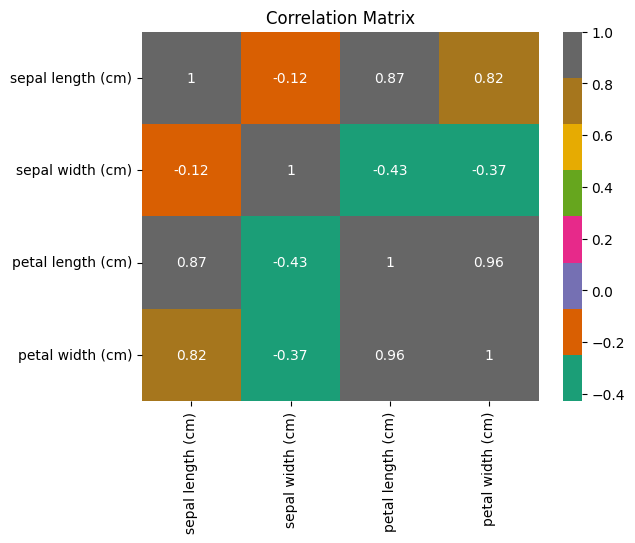

In [50]:
# Plot correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Dark2')
plt.title('Correlation Matrix')
plt.show()

# Find the number of clusters using K-means clusters

In [52]:
# select the features for clustering
x = iris_df.iloc[:,:-1].values

In [55]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('Kmeans:', i, "wcss:", kmeans.inertia_)

Kmeans: 1 wcss: 594.8006666666666
Kmeans: 2 wcss: 133.46431822602608
Kmeans: 3 wcss: 69.42973924466338
Kmeans: 4 wcss: 49.43781558441559
Kmeans: 5 wcss: 40.325266666666664
Kmeans: 6 wcss: 33.00220043290044
Kmeans: 7 wcss: 29.433884962738414
Kmeans: 8 wcss: 25.50773085248086
Kmeans: 9 wcss: 23.630720592960536
Kmeans: 10 wcss: 21.366389385023822


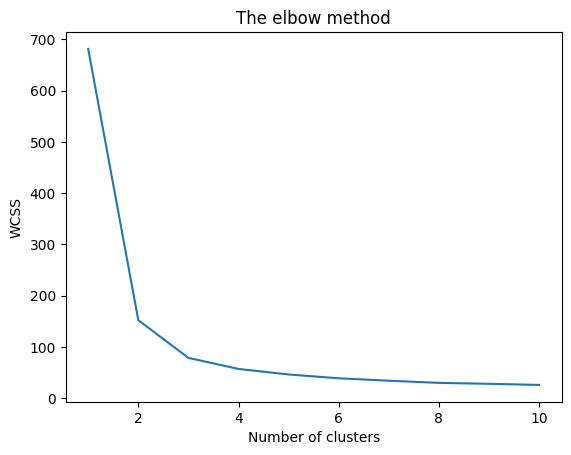

In [19]:
# Plotting the results onto a line graph(elbow curve)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # WCSS - within cluster sum of squares
plt.show()

### From the above plot, A clear elbow is seen to be formed at 3. Thus, the optimum number of clusters is 3

In [57]:
# Applying kmeans to the dataset/ Creating kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 10)
y_kmeans = kmeans.fit_predict(x)

In [58]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

# Cluster Visualization

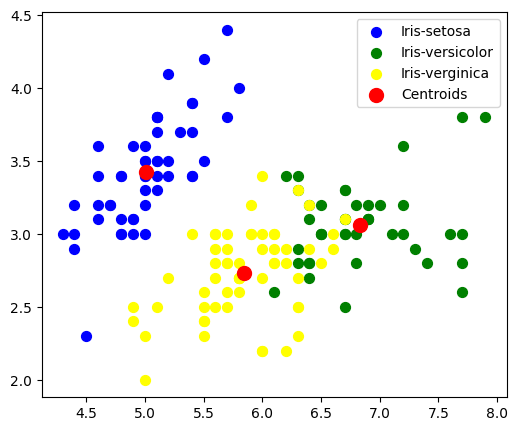

In [62]:
plt.figure(figsize = (6,5))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=50, c='blue',label='Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=50, c='green',label='Iris-versicolor')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=50, c='yellow',label='Iris-verginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100, c='red', label='Centroids')
plt.legend()
plt.show()

### The optimum number of clusters are 3